# Fake News Detection

In this notebook, we will try to identify and detect fake news using Machine Learning.

![news_img](https://images.unsplash.com/photo-1529243856184-fd5465488984?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1492&q=80)Image by Hayden Walker from Unsplash.com



## About This Notebook

This `ipynb` is run on [Google Colab](https://colab.research.google.com/?utm_source=scs-index) as the IDE contains multiple built-in libraries such as `pandas` and many more. It also runs on LinuxOS, which allows more functions that a WinOS user cannot work with.

[Link to the Colab Notebook](https://colab.research.google.com/drive/1fV0mmB0jlo6Xb_zfQ1Jk5gqbb8TopZHF?usp=sharing)

## About The Project

This Machine Learning project is inspired by [DataFlair](https://data-flair.training/blogs/machine-learning-datasets/)'s article: **Machine Learning Datasets for Data Science Beginners**. 

Below is their Project Idea suggestion:

> "*Build a fake news detection model with Passive Aggressive Classifier algorithm. The Passive Aggressive algorithm can classify massive streams of data, it can be implemented quickly.*"

---

# Theory

Before we start working with our data and train a ML model, we will go through some key theories first.

## What is Fake News

> "*Fake news is false or misleading information presented as news. Fake news often has the aim of damaging the reputation of a person or entity, or making money through advertising revenue*"
> 
> **Source: [Wikipedia](https://en.wikipedia.org/wiki/Fake_news)**

Such news items may contain false and/or exaggerated claims, and may end up being viralized by algorithms, and users may end up in a filter bubble. So it is important for us to know which news are fake and properly avoid reading it.

## What is Passive Aggressive Classifier

Passive Aggressive Classifier algorithm is an **Online Learning** (not the online learning we know) Algorithm, which means that it can update its weights as new data comes in. 

In each iteration during learning, the classifier looks at a new instance, assesses whether it has been correctly classified or not, and then updates its weights accordingly:

* If the instance is correctly classified, there is no change in weight.
* if it is misclassified, the algorithm adjusts its weights to better classify future instances based on this misclassified instance.

Read more on Passive Aggressive Classifier [here](https://vitalflux.com/passive-aggressive-classifier-concepts-examples/).

## TF-IDF Vectorizer

TF-IDF (Term Frequency - Inverse Document Frequency) is a text vectorizer that transforms the text into a usable vector.

* Term Frequency is the number of **occurrences** of a specific term in a document.
    * It indicates how **important** a specific term is.
* Document Frequency is the number of **documents** containing a specific term.
    * It indicates how **common** a specific term is.
    * We will use it to determine which terms are more common in real news and fake news.
* **Inverse** Document Frequency is the weight of a term, it aims to reduce the weight of a term if the term's occurence scattered throughout all the documents.

Read more on TF-IDF Vectorizer [here](https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a).

# Set Up

Typically, we will need to install some dependencies before using them in our module.

```bash
pip install numpy pandas matplotlib sklearn
```

But since this notebook is written in Google Colab, the modules are preinstalled for us.

We will first clone the GitHub repository to access the data sets needed in model training. Link to the GitHub repository at [here](https://github.com/LimJY03/FakeNewsDetection).

In [1]:
!git clone https://github.com/LimJY03/FakeNewsDetection

Cloning into 'FakeNewsDetection'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 12 (delta 2), reused 8 (delta 1), pack-reused 0
Unpacking objects: 100% (12/12), done.


## Importing Modules

For this notebook, we will need the following modules:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Importing News Data Set

Now we will load our data set into a Pandas Data Frame:

In [3]:
news_df = pd.read_csv('./FakeNewsDetection/data/data.csv')

---

# Data Exploration

We will now explore our data set. We will start by looking at some preview and details of our data:

In [4]:
news_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
news_df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [6]:
print('Dataframe Shape:', news_df.shape)
print('Unique Values in [Unnamed: 0]:', news_df['Unnamed: 0'].unique().size)

Dataframe Shape: (6335, 4)
Unique Values in [Unnamed: 0]: 6335


Looks like all values in this `Unnamed: 0` column are unique, although it might not be useful for our model training, let's assign a name `id` to it:



In [7]:
news_df.columns = ['id', 'title', 'content', 'label']
news_df.head()

,id,title,content,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


We will also check if there are `NaN` values in our data:

In [8]:
news_df.isna().sum()

id         0
title      0
content    0
label      0
dtype: int64

It looks like our data is already clean, so we can now start with our model training.

---

# Model Training

We will start training our model with the data above. We will start by defining our feature columns and label column:

In [9]:
feature_col = news_df['content']
label_col = news_df['label']

We will now split our data sets into training data and validation data, then we will perform data transformations:

In [10]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(feature_col, label_col, train_size=0.2, random_state=1)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

Below are some explanations on the `TfidfVectorizer` arguments:

* We use `stop_words='english'` to denote that we will be using the English language as our [stop words](https://en.wikipedia.org/wiki/Stop_word).
* We also use `max_df=0.7` to denote that the words that appear in more than 70% of all documents will be discarded.

In [11]:
# Data transformation
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

Moving on we will be fitting our Passive Aggressive Classifier with the data, and then make our prediction:

In [12]:
# Initialize Passive Aggressive classifier
pac = PassiveAggressiveClassifier(max_iter=50)

# Model fitting
pac.fit(X_train, y_train)

# Model prediction
y_pred = pac.predict(X_test)

---

# Model Evaluation

In this section, we will evaluate our model:

In [13]:
score = accuracy_score(y_pred, y_test)
print(f'Accuracy Score: {round(score * 100, 2)}%')

Accuracy Score: 91.36%


This time, we got an accuracy score of 91.36% using this model. Lastly, we will look more on our model's performance through the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix):

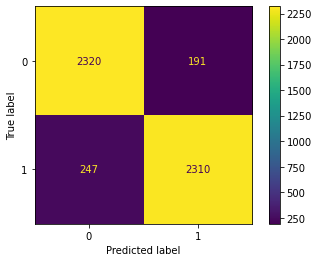

In [14]:
cm = confusion_matrix(y_test, y_pred, labels=['REAL', 'FAKE'])
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
cm_display.plot()
plt.show()

With the confusion_matrix shown above, we can evaluate that this model is able to detect **2320** real news (True Negative) and identify **2310** fake news (True Positive) correctly. However, the model failed to properly identify **438** news (False Negative + False Positive).

Some other performance metrics are as below:

* [Precision](https://en.wikipedia.org/wiki/Precision_and_recall#Precision) of model: 92.36%
* [Recall](https://en.wikipedia.org/wiki/Precision_and_recall#Recall) of model: 90.34%

---

# Conclusion

In this notebook, we have learnt to use the **TF-IDF (Term Frequency - Inverse Document Frequency) Vectorizer** to determine the frequency of each English words in our data set. In this lab, we will discard words that appear more than 70% of all documents.

We also learnt to use the **Passive Aggressive Classifier** to classify our data set into two classes: Fake Data and Real Data. We use this classifier as it will autotune the model while validating if the classification is correct.

Finally, we use the **Confusion Matrix** and the **Precision-Recall** metrics to evaluate our model performance based on its predictions.